In [34]:
import pandas as pd

# Load raw data
df = pd.read_csv("/Q1_data.csv")
print(df.head())

# Check for missing values (none in this case, but good practice)
print("\n\nMissing values:\n", df.isnull().sum())

print("\nLoaded Raw Data:")
print(df)

df["Frailty"] = df["Frailty"].map({"N": 0, "Y": 1})
df['Frailty'] = df['Frailty'].astype(int)

print("\nCleaned Data:")
print(df)

df.to_csv("cleaned_frailty_data.csv", index=False)


   Height  Weight  Age  Grip strength Frailty
0    65.8     112   30             30       N
1    71.5     136   19             31       N
2    69.4     153   45             29       N
3    68.2     142   22             28       Y
4    67.8     144   29             24       Y


Missing values:
 Height           0
Weight           0
Age              0
Grip strength    0
Frailty          0
dtype: int64

Loaded Raw Data:
   Height  Weight  Age  Grip strength Frailty
0    65.8     112   30             30       N
1    71.5     136   19             31       N
2    69.4     153   45             29       N
3    68.2     142   22             28       Y
4    67.8     144   29             24       Y
5    68.7     123   50             26       N
6    69.8     141   51             22       Y
7    70.1     136   23             20       Y
8    67.9     112   17             19       N
9    66.8     120   39             31       N

Cleaned Data:
   Height  Weight  Age  Grip strength  Frailty
0    65.8  

In [36]:
df1 = pd.read_csv("/content/cleaned_frailty_data.csv")

df1.columns = df.columns.str.strip()

import scipy.stats as stats

def perform_ttest(data, column, group_column, group1, group2):
    group1_data = data[data[group_column] == group1][column]
    group2_data = data[data[group_column] == group2][column]

    t_stat, p_val = stats.ttest_ind(group1_data, group2_data, equal_var=False)

    print(f"T-Test results for {column} between {group1} and {group2} groups:")
    print(f"T-Statistic: {t_stat:.4f}")
    print(f"P-Value: {p_val:.4f}")
    return t_stat, p_val

# Perform the T-test for Grip Strength
perform_ttest(df1, "Grip strength", "Frailty", 1, 0)

T-Test results for Grip strength between 1 and 0 groups:
T-Statistic: -1.6350
P-Value: 0.1416


(-1.6349999934600006, 0.1415730416628566)

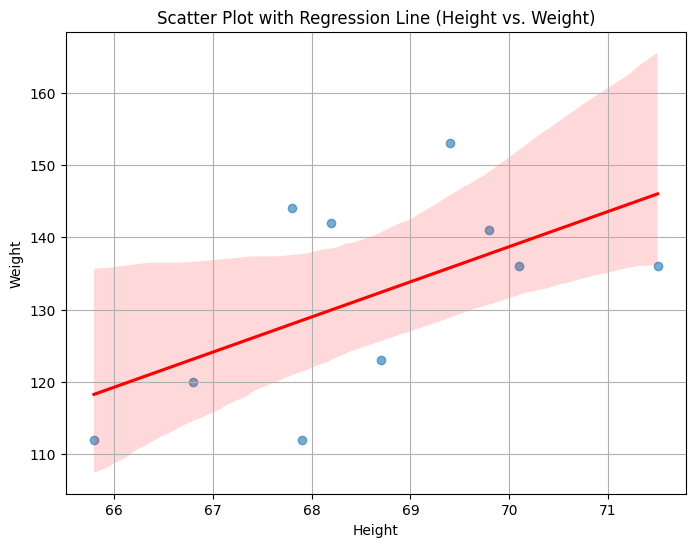

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.regplot(x=df['Height'], y=df['Weight'], scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Scatter Plot with Regression Line (Height vs. Weight)')
plt.grid(True)
plt.show()